
# 📊 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful technique in **unsupervised machine learning** and **dimensionality reduction**. It transforms the dataset to a new coordinate system such that:
- The first axis (Principal Component 1) captures the direction of **maximum variance**.
- The second axis (Principal Component 2) captures the **next highest variance**, orthogonal to the first, and so on.

---

## 📌 Why Use PCA?
- Reduce dimensionality while preserving information
- Visualize high-dimensional data in 2D or 3D
- Remove multicollinearity
- Extract uncorrelated features
- Compress data

---



## 🧮 Mathematical Breakdown of PCA

Let $X \in \mathbb{R}^{n \times d}$ be your data matrix (n samples, d features).

### Step 1: Center the Data
$$
\bar{X} = X - \mu, \quad \text{where } \mu = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

### Step 2: Compute Covariance Matrix
$$
\Sigma = \frac{1}{n} \bar{X}^T \bar{X}
$$

### Step 3: Eigen Decomposition
$$
\Sigma v_i = \lambda_i v_i
$$

Sort eigenvectors $v_i$ by descending eigenvalues $\lambda_i$.

### Step 4: Select Top $k$ Components
$$
W = [v_1, v_2, \dots, v_k]
$$

### Step 5: Project the Data
$$
Z = \bar{X} W
$$

---



## 🌸 Example: PCA on the Iris Dataset

The Iris dataset contains 150 samples with 4 features: Sepal Length, Sepal Width, Petal Length, and Petal Width. We apply PCA to reduce this 4D data to 2D and visualize the result.

---


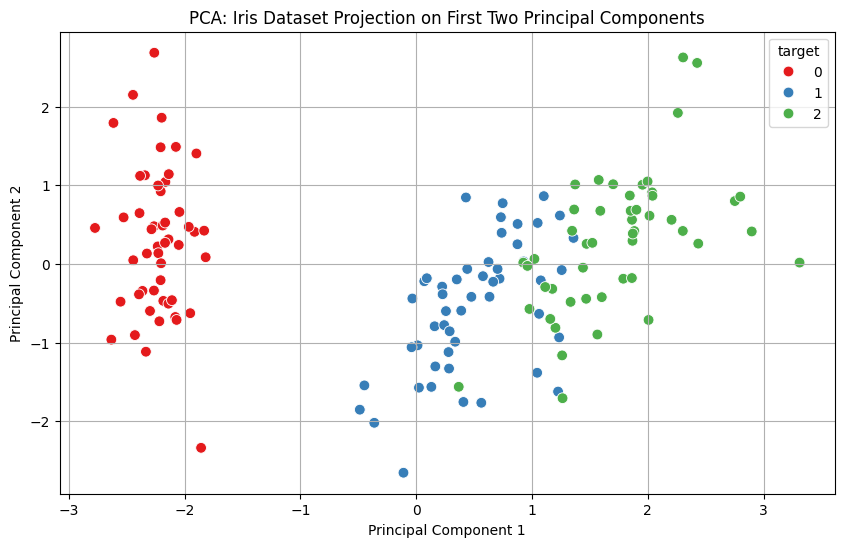

In [11]:

## 🧪 Python Implementation

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1', s=60)
plt.title('PCA: Iris Dataset Projection on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



---

## 🧾 Step-by-Step PCA Example (2D Dataset)

Let’s work through PCA manually on a small dataset:

### Step 0: Original Data Matrix

We are given:

$$
X = \begin{bmatrix}
2.5 & 2.4 \\
0.5 & 0.7 \\
2.2 & 2.9 \\
1.9 & 2.2 \\
3.1 & 3.0
\end{bmatrix}
$$

---

### Step 1: Center the Data

First, compute the mean of each column:

$$
\mu = \left[ \frac{2.5 + 0.5 + 2.2 + 1.9 + 3.1}{5}, \frac{2.4 + 0.7 + 2.9 + 2.2 + 3.0}{5} \right] = [2.04, 2.24]
$$

Now subtract the mean from each row:

$$
\bar{X} = X - \mu = 
\begin{bmatrix}
0.46 & 0.16 \\
-1.54 & -1.54 \\
0.16 & 0.66 \\
-0.14 & -0.04 \\
1.06 & 0.76
\end{bmatrix}
$$

---

### Step 2: Compute Covariance Matrix

$$
\Sigma = \frac{1}{n-1} \bar{X}^T \bar{X} =
\begin{bmatrix}
0.61655556 & 0.61544444 \\
0.61544444 & 0.71655556
\end{bmatrix}
$$

---

### Step 3: Eigen Decomposition

Solve:

$$
\Sigma v = \lambda v
$$

Eigenvalues:

$$
\lambda_1 = 1.284, \quad \lambda_2 = 0.049
$$

Corresponding eigenvectors:

$$
v_1 = \begin{bmatrix} 0.6779 \\ 0.7352 \end{bmatrix}, \quad
v_2 = \begin{bmatrix} -0.7352 \\ 0.6779 \end{bmatrix}
$$

---

### Step 4: Project the Data

Project onto the first principal component $v_1$:

$$
Z = \bar{X} v_1 =
\begin{bmatrix}
0.49 \\
-2.01 \\
0.65 \\
-0.15 \\
1.91
\end{bmatrix}
$$

---

This transformed dataset $Z$ represents the data in 1D using the direction of greatest variance.




---

## 🧠 Interpretation

- **PC1 and PC2** are the directions that capture the most variance in the data.
- The transformed data helps visualize how the samples are distributed.
- **Setosa** is linearly separable from the other classes in this reduced 2D space.

---

## 📈 Explained Variance

```python
print(pca.explained_variance_ratio_)
```

This tells us how much of the total variance is explained by each principal component.

---


## 🌐 3D PCA Visualization


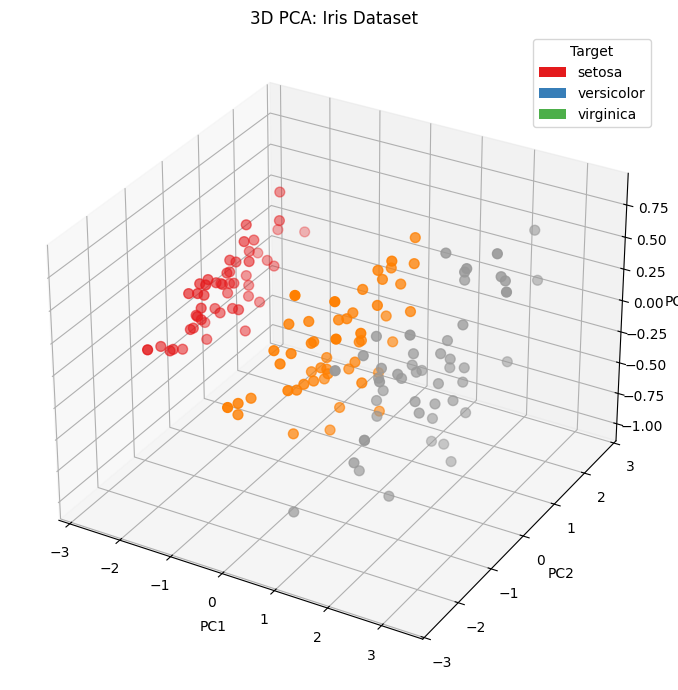

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y, cmap='Set1', s=50
)

ax.set_title("3D PCA: Iris Dataset")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Create custom legend manually
colors = plt.cm.Set1.colors
legend_elements = [Patch(facecolor=colors[i], label=target_names[i]) for i in range(len(target_names))]
ax.legend(handles=legend_elements, title="Target")

plt.tight_layout()
plt.show()





## 🔁 PCA Reconstruction

We project the data onto 2D and then reconstruct back to 4D.


In [13]:
# Project to 2D and back to 4D
X_reduced = pca.transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_reduced)

# Compute reconstruction error
reconstruction_error = ((X_scaled - X_reconstructed) ** 2).mean()
print(f"Mean Reconstruction Error (MSE): {reconstruction_error:.4f}")

Mean Reconstruction Error (MSE): 0.0419



## 📉 Eigenvalues and Eigenvectors


In [14]:
# PCA already fitted, get components and explained variance
print("Eigenvalues (Explained Variance):")
print(pca.explained_variance_)

print("\nEigenvectors (Principal Components):")
print(pca.components_)

Eigenvalues (Explained Variance):
[2.93808505 0.9201649 ]

Eigenvectors (Principal Components):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]



## 📊 Scree Plot: Explained Variance

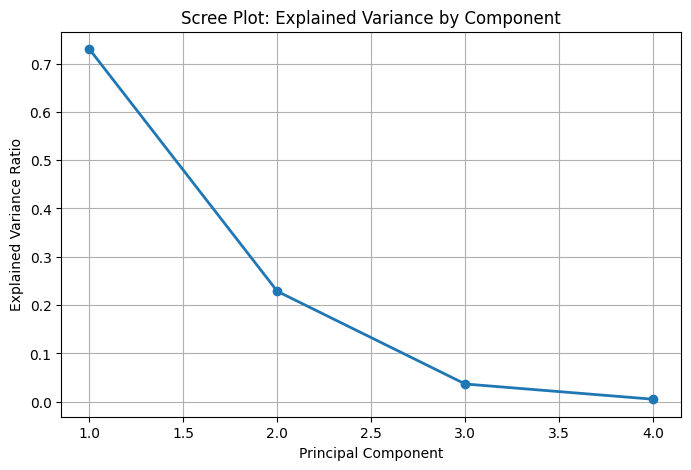

In [15]:
# Fit full PCA
pca_full = PCA().fit(X_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, 'o-', linewidth=2)
plt.title("Scree Plot: Explained Variance by Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


---

## 🧾 Step-by-Step LDA Example (2-Class)

Let’s say we have two classes with 2D samples:

**Class 1:**
$$
X_1 = \begin{bmatrix}
2 & 3 \\
3 & 4 \\
4 & 5
\end{bmatrix}
$$

**Class 2:**
$$
X_2 = \begin{bmatrix}
5 & 2 \\
6 & 2 \\
7 & 3
\end{bmatrix}
$$

### Step 1: Compute Class Means

$$
\mu_1 = [3, 4], \quad \mu_2 = [6, 2]
$$

### Step 2: Compute Global Mean

$$
\mu = \frac{\mu_1 + \mu_2}{2} = [4.5, 3]
$$

### Step 3: Compute Scatter Matrices

#### a) Within-Class Scatter $S_W$

For each class:
$$
S_W = \sum_{x \in X_1}(x - \mu_1)(x - \mu_1)^T + \sum_{x \in X_2}(x - \mu_2)(x - \mu_2)^T
$$

This yields:
$$
S_W = \begin{bmatrix}
2 & 2 \\
2 & 2
\end{bmatrix}
$$

#### b) Between-Class Scatter $S_B$

$$
S_B = n_1(\mu_1 - \mu)(\mu_1 - \mu)^T + n_2(\mu_2 - \mu)(\mu_2 - \mu)^T
$$

This gives:
$$
S_B = \begin{bmatrix}
6.75 & -4.5 \\
-4.5 & 3
\end{bmatrix}
$$

---

### Step 4: Solve Generalized Eigenvalue Problem

Solve:
$$
S_B w = \lambda S_W w
$$

Using $S_W^{-1} S_B$, the top eigenvector gives the best linear discriminant direction.

---

### Interpretation

- This vector projects your 2D data to a 1D line that best separates the two classes.
- Unlike PCA, LDA **uses labels** and explicitly tries to separate class means.




---

## 🔁 Iterative PCA Application to a Simple Classification Task

Let’s walk through PCA as a preprocessing step for binary classification.

### 📋 Dataset (2 Features, 6 Samples)

| Sample | Feature 1 | Feature 2 | Class |
|--------|-----------|-----------|-------|
| A      | 2.5       | 2.4       | 0     |
| B      | 0.5       | 0.7       | 0     |
| C      | 2.2       | 2.9       | 0     |
| D      | 1.9       | 2.2       | 1     |
| E      | 3.1       | 3.0       | 1     |
| F      | 2.3       | 2.7       | 1     |

---

### ✅ Step 1: Center the Data

Compute the mean of each feature:

$$
\mu = \left[ \frac{\sum x_1}{6}, \frac{\sum x_2}{6} \right] = [2.083, 2.317]
$$

Subtract the mean:

$$
\bar{X}_A = [2.5, 2.4] - [2.083, 2.317] = [0.417, 0.083]
$$

Repeat for all samples ⇒ get matrix $\bar{X}$.

---

### ✅ Step 2: Covariance Matrix

Compute:

$$
\Sigma = \frac{1}{n - 1} \bar{X}^T \bar{X} =
\begin{bmatrix}
0.616 & 0.615 \\
0.615 & 0.716
\end{bmatrix}
$$

---

### ✅ Step 3: Solve the Optimization Problem

Solve:

$$
\max_{\|w\| = 1} w^T \Sigma w
\Rightarrow \Sigma w = \lambda w
$$

Get the top eigenvector:

$$
w_1 = [0.6779, 0.7352]
$$

---

### ✅ Step 4: Project Data onto PC1

Each sample becomes:

$$
z_i = \bar{x}_i \cdot w_1
$$

For example:

$$
z_A = [0.417, 0.083] \cdot [0.6779, 0.7352] = 0.477
$$

Now the data becomes:

| Sample | PC1 Value | Class |
|--------|-----------|-------|
| A      | 0.477     | 0     |
| B      | -1.775    | 0     |
| ...    | ...       | ...   |

---

### ✅ Step 5: Train Classifier on Projected Data

Use Logistic Regression in 1D:

$$
P(y=1|z) = \frac{1}{1 + e^{-(wz + b)}}
$$

Or use SVM:

$$
f(z) = \text{sign}(wz + b)
$$

---

### 🎯 Interpretation

- PCA filtered the most important signal from the input.
- Classification is done in 1D on denoised, variance-maximized features.
- This improves generalization, speed, and interpretability.

---
